In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [7]:
X = data.iloc[:,:-1]
y = data.target

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [15]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9777777777777777


In [16]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
target,,,
0,20,0,0
1,0,13,1
2,0,0,11


In [17]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


In [18]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

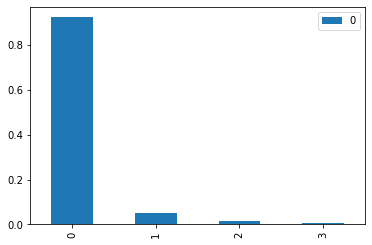

In [19]:
iris_var = pd.DataFrame(pca.explained_variance_ratio_)
iris_var.plot(kind='bar')

In [20]:
X = X.iloc[:,:-2]
X.head(2)

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557


In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=12)

model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9555555555555556
